In [1]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
os.getcwd()
warnings.filterwarnings("ignore")

In [16]:
# Include preprocessing and evaluation
%run 'preprocessing.ipynb'
%run 'evaluation.ipynb'

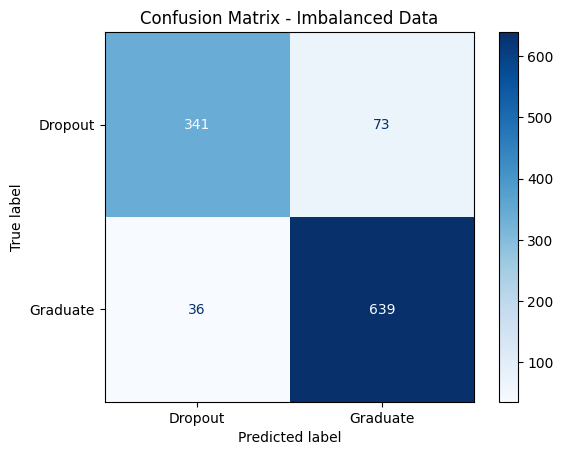


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.90      | 0.82   | 0.86     |
    | Graduate   | 0.90      | 0.95   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.90      |          
    | ROC-AUC    | 0.885     |            
    --------------------------
    


In [18]:
# Train a Random Forest classifier
test_size = 0.3
X_train, X_test, y_train, y_test = preprocessing(test_size, False)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_pred, 'Imbalanced Data'))

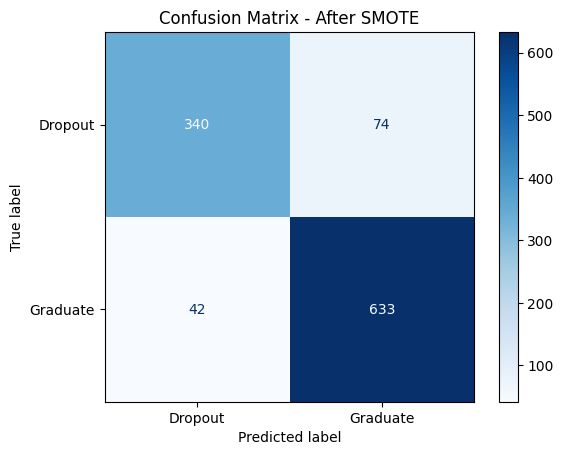


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.89      | 0.82   | 0.85     |
    | Graduate   | 0.90      | 0.94   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.880     |            
    --------------------------
    


In [19]:
# Handle class imbalance using SMOTE
X_train, X_test, y_train, y_test = preprocessing(test_size, True)

# Train the Random Forest model on the resampled dataset
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_rf_pred, 'After SMOTE'))

In [24]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the optimized model
optimized_rf = grid_search.best_estimator_
optimized_rf.fit(X_train, y_train)

# Evaluate on the test set
y_optimized_pred = optimized_rf.predict(X_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] 

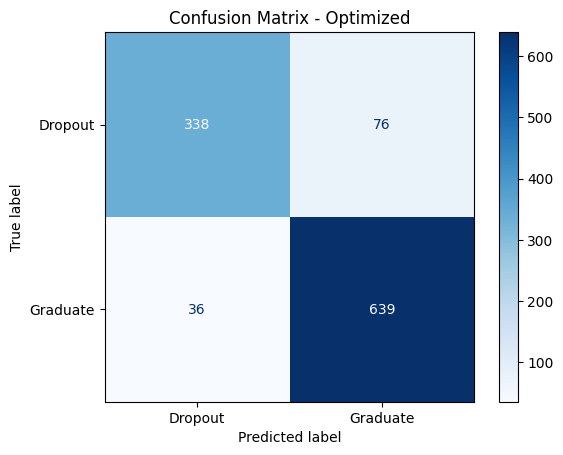


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.90      | 0.82   | 0.86     |
    | Graduate   | 0.89      | 0.95   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.90      |          
    | ROC-AUC    | 0.882     |            
    --------------------------
    
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_s

In [17]:
# Evaluate the model
print(eval_model_generate_markdown(y_test, y_optimized_pred, 'Optimized'))

In [ ]:
# Extract Feature Importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for Feature Importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the Feature Importances
print(importance_df)

# Visualize the Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importances from Random Forest', fontsize=14)
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.show()
